全局变量

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
WindProducePrice = 0.5 #风电成本 元/kwh
LightProducePrice = 0.4 #光电成本 元/kwh
BuyInPrice = 1 #主电网购入成本 元/kwh
batteryCapacity = 100 #电池容量 kwh
batteryPower = 50 #电池功率 kw

#数据预处理#

In [3]:
data1 = pd.read_excel('A题附件1：各园区典型日负荷数据.xlsx')
data1

,时间（h）,园区A负荷(kW),园区B负荷(kW),园区C负荷(kW),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,00:00:00,275,241,302,NaN,NaN,NaN,NaN
1,01:00:00,275,253,292,NaN,NaN,NaN,NaN
2,02:00:00,277,329,307,NaN,NaN,NaN,NaN
3,03:00:00,310,315,293,NaN,NaN,NaN,NaN
4,04:00:00,310,290,271,NaN,NaN,NaN,NaN
5,05:00:00,293,270,252,NaN,NaN,NaN,NaN
6,06:00:00,293,307,283,NaN,NaN,NaN,NaN
7,07:00:00,380,354,223,NaN,NaN,NaN,NaN
8,08:00:00,375,264,292,NaN,NaN,NaN,NaN
9,09:00:00,281,315,283,NaN,NaN,NaN,NaN


In [4]:
data2 = pd.read_excel('data2.xlsx')#读入数据，附件2
data2 = data2.iloc[30:,]
data2 = data2.reset_index(drop=True)
data2

,说明：表中数据标幺值以相应的风/光额定装机容量为基准,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00:00:00,0,230.1,0,73.2,73.2,303.3,818,514.7
1,01:00:00,0,382.8,0,108.75,108.75,491.55,820,328.45
2,02:00:00,0,296.8,0,197.95,197.95,494.75,913,418.25
3,03:00:00,0,444.4,0,91.55,91.55,535.95,918,382.05
4,04:00:00,0,502.9,0,235.8,235.8,738.7,871,132.3
5,05:00:00,0,360.9,0,310.75,310.75,671.65,815,143.35
6,06:00:00,0,240.2,0,147.3,147.3,387.5,883,495.5
7,07:00:00,4.35,47.3,6.3,60.7,67,118.65,957,838.35
8,08:00:00,226.95,153.8,196.8,12.5,209.3,590.05,931,340.95
9,09:00:00,451.5,106.8,378.84,151.15,529.99,1088.29,879,-209.29


In [5]:
LightProduceByA = data2['Unnamed: 1'].values.tolist()
WinProduceByB = data2['Unnamed: 2'].values.tolist()
LightProduceByC = data2['Unnamed: 3'].values.tolist()
WinProduceByC = data2['Unnamed: 4'].values.tolist()
LoadA = data1['园区A负荷(kW)'].values.tolist()
LoadB = data1['园区B负荷(kW)'].values.tolist()
LoadC = data1['园区C负荷(kW)'].values.tolist()

#第一问第一小问：

In [6]:
EA_buy = np.maximum((np.array(LoadA) - np.array(LightProduceByA)), 0) #shape(24,)
EA_curt = np.maximum((np.array(LightProduceByA) - np.array(LoadA)), 0)
A_LightProduce = np.array(LightProduceByA)

EB_buy = np.maximum((np.array(LoadB) - WinProduceByB), 0)
EB_curt = np.maximum((np.array(WinProduceByB) - np.array(LoadB)), 0)
B_WindProduce = np.array(WinProduceByB)

EC_buy = np.maximum((np.array(LoadC) - np.array(LightProduceByC) - np.array(WinProduceByC)), 0)
EC_curt = np.maximum((np.array(LightProduceByC) + np.array(WinProduceByC) - np.array(LoadC)), 0)
C_LightProduce = np.array(LightProduceByC)
C_WindProduce = np.array(WinProduceByC)

def Compute_Single_Cost(E_buy, E_curt, LightProduce, LightPrice, WindProduce, WindPrice):
    #array : E_buy, E_curt
    #const : LPro, LPri, WPro, WPri
    return E_buy * BuyInPrice + WindProduce * WindPrice + LightProduce * LightPrice

ACost = Compute_Single_Cost(EA_buy, EA_curt, A_LightProduce, LightProducePrice, 0, WindProducePrice)
BCost = Compute_Single_Cost(EB_buy, EB_curt, 0, A_LightProduce, B_WindProduce, WindProducePrice)
CCost = Compute_Single_Cost(EC_buy, EC_curt, C_LightProduce, LightProducePrice, C_WindProduce, WindProducePrice)

APer = ACost.sum() / np.sum(LoadA)
BPer = BCost.sum() / np.sum(LoadB)
CPer = CCost.sum() / np.sum(LoadC)

APer, BPer, CPer

(0.8182957853436275, 0.7159403372243839, 0.7037136059670783)

In [7]:
TotalData = pd.DataFrame(columns=[
    'A园区购电量',
    'A园区弃电量',
    'A园区负荷',
    'A园区总供电成本',
    'A园区平均供电成本',
    'B园区购电量',
    'B园区弃电量',
    'B园区负荷',
    'B园区总供电成本',
    'B园区平均供电成本',
    'C园区购电量',
    'C园区弃电量',
    'C园区负荷',
    'C园区总供电成本',
    'C园区平均供电成本'
    ])
for i in range(len(EA_buy)):
    new_row = pd.DataFrame({
    'A园区购电量':[EA_buy[i]],
    'A园区弃电量':[EA_curt[i]],
    'A园区负荷':[LoadA[i]],
    'A园区总供电成本':[ACost[i]],
    'A园区平均供电成本':[APer],
    'B园区购电量':[EB_buy[i]],
    'B园区弃电量':[EB_curt[i]],
    'B园区负荷':[LoadB[i]],
    'B园区总供电成本':[BCost[i]],
    'B园区平均供电成本':[BPer],
    'C园区购电量':[EC_buy[i]],
    'C园区弃电量':[EC_curt[i]],
    'C园区负荷':[LoadC[i]],
    'C园区总供电成本':[CCost[i]],
    'C园区平均供电成本':[CPer],
    })
    TotalData = pd.concat([TotalData,new_row], ignore_index=False)
TotalData.to_excel('第一题第一小问数据.xlsx')

In [8]:
Check_row = pd.DataFrame({
'园区购电量':[0],
'园区弃电量':[0],
'园区负荷':[0],
'园区总供电成本':[0],
'园区平均供电成本':[0]
})
Check_row['园区购电量']

0    0
Name: 园区购电量, dtype: int64

#第一问第二小问：

In [14]:
def calculate_costs(Produce,Loads,Price,TypedPrice,NoBattery):
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 10 #初始化电池容量
    TotalData = pd.DataFrame(columns=[
        '时间', 
        '电池电量', 
        '负荷-发电', 
        '买电花费',
        '产电成本',
        '总花费',
        '买电花费(无电池)',
        '产电成本(无电池)',
        '总花费(无电池)'
        ])
    CheckData = pd.DataFrame(columns=[
    '园区购电量',
    '园区弃电量',
    '园区负荷',
    '园区总供电成本',
    '园区平均供电成本'
    ])
    FirstFlag = True
    iteration = 0
    totalcost = 0
    temptotal = 0
    for PowerProduce,Load in zip(Produce,Loads):#PowerProduce为发电量，Load为负荷量
        '''
        Check_row = pd.DataFrame({
        '园区购电量':[0],
        '园区弃电量':[0],
        '园区负荷':[Load],
        '园区总供电成本':[0],
        '园区平均供电成本':[0]
        })
        '''
        Demand = Load-PowerProduce #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                CurrentBatteryAvalibleCapacity = min(batteryPower,CurrentBatteryCapacity-min_battery_Capacity) #当前可用电量
                if(Demand-(CurrentBatteryAvalibleCapacity)*0.95>0):#判断是否需要额外买电
                    Check_row['园区购电量'] = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)
                    BuyInElcCost = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)/Price
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity-=CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity - CurrentBatteryAvalibleCapacity
            else:
                Check_row['园区购电量'] = Demand
                BuyInElcCost = Demand/Price
                ProduceElcCost = (PowerProduce*TypedPrice)
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity):#判断电池是否可以充电
                CurrentBatteryAvalibleCapacity = min(batteryPower,max_battery_Capacity-CurrentBatteryCapacity) #当前可充电量
                if(abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95>0):#判断是否弃电
                    Check_row['园区弃电量'] = abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity += CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(CurrentBatteryAvalibleCapacity)*0.95
            else:
                Check_row['园区弃电量'] = abs(Demand)
                ProduceElcCost = (PowerProduce*TypedPrice)
        totalcost = BuyInElcCost+ProduceElcCost
        Check_row['园区总供电成本'] = totalcost
        temptotal +=totalcost
         # 记录每次循环的数据
        new_row = pd.DataFrame({
        '时间':[iteration],
        '电池电量':[CurrentBatteryCapacity],
        '负荷-发电':[Demand],
        '买电花费':[BuyInElcCost],
        '产电成本':[ProduceElcCost],
        '总花费':[totalcost],
        '买电花费(无电池)':[NoBattery[0][iteration]],
        '产电成本(无电池)':[NoBattery[1][iteration]],
        '总花费(无电池)':[NoBattery[2][iteration]]
        })
        TotalData = pd.concat([TotalData,new_row], ignore_index=False)
        CheckData = pd.concat([CheckData,Check_row], ignore_index=False)
        iteration +=1
    CheckData['园区平均供电成本'] = temptotal/np.sum(np.array(Loads))
    return temptotal

In [15]:
def calculate_costs_for_multy(LightProduce,WindProduce,Loads,Price,LightTypedPrice,WindTypedPrice,NoBattery):
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 10 #初始化电池容量
    TotalData = pd.DataFrame(columns=[
        '时间', 
        '电池电量', 
        '负荷-发电', 
        '买电花费',
        '产电成本',
        '总花费',
        '买电花费(无电池)',
        '产电成本(无电池)',
        '总花费(无电池)'
        ])
    CheckData = pd.DataFrame(columns=[
    '园区购电量',
    '园区弃电量',
    '园区负荷',
    '园区总供电成本',
    '园区平均供电成本'
    ])
    FirstFlag = True
    iteration = 0
    totalcost = 0
    temptotal = 0
    for LightPowerProduce,WindPowerProduce,Load in zip(LightProduce,WindProduce,Loads):#PowerProduce为发电量，Load为负荷量
        '''Check_row = pd.DataFrame({
        '园区购电量':[0],
        '园区弃电量':[0],
        '园区负荷':[Load],
        '园区总供电成本':[0],
        '园区平均供电成本':[0]
        })'''
        PowerProduce = (LightPowerProduce+WindPowerProduce)
        Demand = Load-(LightPowerProduce+WindPowerProduce) #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                CurrentBatteryAvalibleCapacity = min(batteryPower,CurrentBatteryCapacity-min_battery_Capacity) #当前可用电量
                if(Demand-(CurrentBatteryAvalibleCapacity)*0.95>0):#判断是否需要额外买电
                    Check_row['园区购电量'] = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)
                    BuyInElcCost = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)/Price
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity-=CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity - CurrentBatteryAvalibleCapacity
            else:
                Check_row['园区购电量'] = Demand
                BuyInElcCost = Demand/Price
                ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity):#判断电池是否可以充电
                CurrentBatteryAvalibleCapacity = min(batteryPower,max_battery_Capacity-CurrentBatteryCapacity) #当前可充电量
                if(abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95>0):#判断是否弃电
                    Check_row['园区弃电量'] = abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity += CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(CurrentBatteryAvalibleCapacity)*0.95
            else:
                Check_row['园区弃电量'] = abs(Demand)
                ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
        totalcost = BuyInElcCost+ProduceElcCost
        Check_row['园区总供电成本'] = totalcost
        temptotal +=totalcost
         # 记录每次循环的数据
        new_row = pd.DataFrame({
        '时间':[iteration],
        '电池电量':[CurrentBatteryCapacity],
        '负荷-发电':[Demand],
        '买电花费':[BuyInElcCost],
        '产电成本':[ProduceElcCost],
        '总花费':[totalcost],
        '买电花费(无电池)':[NoBattery[0][iteration]],
        '产电成本(无电池)':[NoBattery[1][iteration]],
        '总花费(无电池)':[NoBattery[2][iteration]]
        })
        TotalData = pd.concat([TotalData,new_row], ignore_index=False)
        CheckData = pd.concat([CheckData,Check_row], ignore_index=False)
        iteration +=1
    CheckData['园区平均供电成本'] = temptotal/np.sum(np.array(Loads))
            
    return temptotal

In [35]:
calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice,[EA_buy*BuyInPrice,
                                                                    A_LightProduce*LightProducePrice,
                                                                    ACost])[0].to_excel('第一问第二小问园区A.xlsx')
calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice,[EA_buy*BuyInPrice,
                                                                    A_LightProduce*LightProducePrice,
                                                                    ACost])[1].to_excel('第一问第二小问园区A_用于对比第一小问.xlsx')
calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice,[EB_buy*BuyInPrice,
                                                                 B_WindProduce*WindProducePrice,
                                                                 BCost])[0].to_excel('第一问第二小问园区B.xlsx')
calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice,[EB_buy*BuyInPrice,
                                                                 B_WindProduce*WindProducePrice,
                                                                 BCost])[1].to_excel('第一问第二小问园区B_用于对比第一小问.xlsx')
calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice,[
    EC_buy*BuyInPrice,
    C_LightProduce*LightProducePrice+C_WindProduce*WindProducePrice,
    CCost])[0].to_excel('第一问第二小问园区C.xlsx')
calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice,[
    EC_buy*BuyInPrice,
    C_LightProduce*LightProducePrice+C_WindProduce*WindProducePrice,
    CCost])[1].to_excel('第一问第二小问园区C_用于对比第一小问.xlsx')

IndexError: invalid index to scalar variable.

#第一问第三小问

In [49]:
s_c1 = 80
e_c1 = 250
st_c1 = 1
s_p1 = 50
e_p1 = 200
st_p1 = 1
def ComputeCostWithDifferentPC_Q1(start_c, end_c, step_c, start_p, end_p, step_p):
    CapacityRange = np.arange(start_c,end_c,step_c)
    PowerRange = np.arange(start_p,end_p,step_p)
    TotalCost = np.zeros((len(PowerRange), len(CapacityRange)))
    x=-1
    for batteryPower in tqdm(PowerRange,desc="Power"):
        x+=1
        y=-1
        for batteryCapacity in tqdm(CapacityRange,desc="Capacity",leave = False):
            y+=1
            SetBatteryCostPer = (batteryCapacity*1800 + batteryPower*800) / (10*365) #分十年均摊电池费用到每天
            TotalCost[x,y] = (calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice,
                                                                        [EA_buy*BuyInPrice,
                                                                        A_LightProduce*LightProducePrice,
                                                                        ACost]) + 
                                   calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice,
                                                                    [EB_buy*BuyInPrice,
                                                                     B_WindProduce*WindProducePrice,
                                                                     BCost]) + 
                                  calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice,[
                                                                    EC_buy*BuyInPrice,
                                                                    C_LightProduce*LightProducePrice+C_WindProduce*WindProducePrice,
                                                                    CCost])+ 
                                    SetBatteryCostPer)
        
    return TotalCost
TotalCost_Q_1_3 = ComputeCostWithDifferentPC(s_c1, e_c1, st_c1, s_p1, e_p1, st_p1)#start_c, end_c, step_c, start_p, end_p, step_p

Power:   0%|                                                                                   | 0/150 [00:05<?, ?it/s]


KeyboardInterrupt: 

[[17179.1429589  17176.88110959 17174.61926027 ... 16866.29912329
  16865.36727397 16864.43542466]
 [17178.41213699 17176.15028767 17173.88843836 ... 16859.91580137
  16858.98395205 16858.05210274]
 [17177.68131507 17175.41946575 17173.15761644 ... 16853.53247945
  16852.60063014 16851.66878082]
 ...
 [17201.10213699 17198.11828767 17195.13443836 ... 17021.33830137
  17018.79145205 17016.24460274]
 [17201.32131507 17198.33746575 17195.35361644 ... 17023.83747945
  17022.81063014 17020.26378082]
 [17201.54049315 17198.55664384 17195.57279452 ... 17024.05665753
  17024.54980822 17024.2829589 ]]
(170,) (150,)


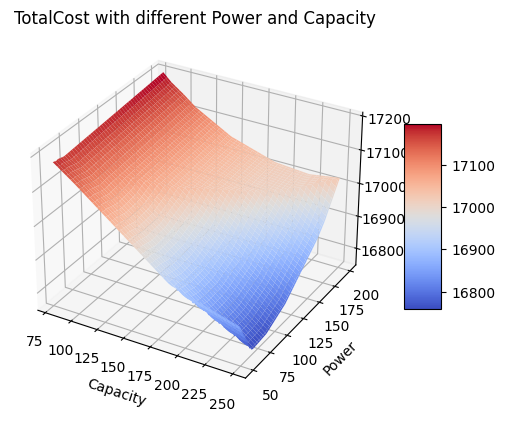

(150,) (170,)


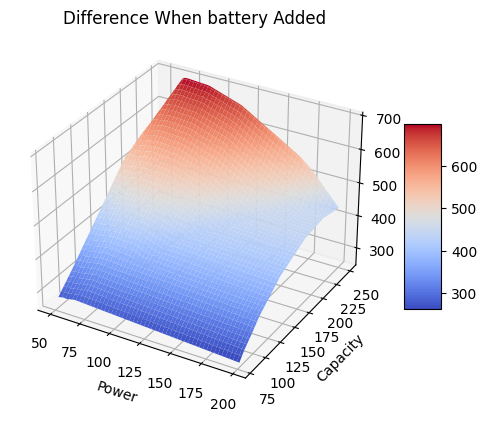

In [45]:
CapacityRange = np.arange(st_c,end_c,step_c)
PowerRange = np.arange(st_p,end_p,step_p)
TotalCost_Q_1_3 = np.array(pd.read_excel('Z.xlsx'))
TotalCost_Q_1_3 = TotalCost_Q_1_3[:,1:]
print(TotalCost_Q_1_3)
def Plot_3D(X,xLabel, Y,yLabel, Z,zLabel,title):
    print(X.shape,Y.shape)
    X, Y = np.meshgrid(X, Y)
    Z = np.array(Z)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_zlabel(zLabel)
    ax.set_title(title)
    plt.show()

Plot_3D(CapacityRange, 'Capacity',PowerRange,'Power', TotalCost_Q_1_3, 'TotalCost' , 'TotalCost with different Power and Capacity')
Plot_3D(PowerRange, 'Power', CapacityRange, 'Capacity',  ACost.sum()+BCost.sum()+CCost.sum()-TotalCost_Q_1_3.T, 'Savings' ,'Difference When battery Added')

In [48]:
def FindMinCost(TotalCost,PowerBias, CapacityBias):
    MinTotalCost = np.min(np.array(TotalCost))
    MinTotalCostIndex = np.where(np.array(TotalCost) == MinTotalCost)
    Min_Power_Capacity = list(zip(MinTotalCostIndex[0]+PowerBias, MinTotalCostIndex[1]+CapacityBias))
    return MinTotalCost, Min_Power_Capacity
MinTotalCost_Q_1_3, Min_Power_Capacity_Q_1_3 = FindMinCost(TotalCost_Q_1_3,s_p1,s_c1)
MinTotalCost_Q_1_3, Min_Power_Capacity_Q_1_3

(16757.25566438356, [(71, 249)])

#第二问 第一小题

In [28]:
TotalLoad = []
ToTalProduce = []
LightProduceByTotal = []
WindProduceByTotal = []
for A,B,C in zip(LoadA,LoadB,LoadC):
    TotalLoad.append(A+B+C)
for A,B,C,D in zip(LightProduceByA,(WinProduceByB),(LightProduceByC),(WinProduceByC)):
    ToTalProduce.append(A+B+C+D)
for A,B in zip(LightProduceByA,LightProduceByC):
    LightProduceByTotal.append(A+B)
for A,B in zip(WinProduceByB,WinProduceByC):
    WindProduceByTotal.append(A+B)

ELeBuyTotal = np.maximum((np.array(TotalLoad) - np.array(ToTalProduce)), 0)
EleCurtTotal = np.maximum((np.array(ToTalProduce) - np.array(TotalLoad)), 0)


def Compute_Single_Cost(E_buy, E_curt, LightProduce, LightPrice, WindProduce, WindPrice):
    #array : E_buy, E_curt
    #const : LPro, LPri, WPro, WPri
    return E_buy * BuyInPrice + WindProduce * WindPrice + LightProduce * LightPrice

TotalCost = Compute_Single_Cost(ELeBuyTotal, EleCurtTotal, np.array(LightProduceByTotal), LightProducePrice, np.array(WindProduceByTotal), WindProducePrice)

TotalPer = TotalCost.sum() / np.sum(TotalLoad)
TotalData = pd.DataFrame(columns=[
    '复合园区购电量',
    '复合园区弃电量',
    '复合园区负荷',
    '复合园区总供电成本',
    '复合园区平均供电成本',
    ])
for i in range(len(EA_buy)):
    new_row = pd.DataFrame({
    '复合园区购电量':[ELeBuyTotal[i]],
    '复合园区弃电量':[EleCurtTotal[i]],
    '复合园区负荷':[TotalLoad[i]],
    '复合园区总供电成本':[TotalCost[i]],
    '复合园区平均供电成本':[TotalPer],
    })
    TotalData = pd.concat([TotalData,new_row], ignore_index=False)
TotalData.to_excel('第二题第一小问数据.xlsx')

#第二问 第二小题

In [53]:
s_c2 = 80
e_c2 = 250
st_c2 = 1
s_p2 = 50
e_p2 = 200
st_p2 = 1
Range_Q2 = (s_c2, e_c2,st_c2, s_p2, e_p2, st_p2)

def ComputeCostWithDifferentPC_Q2(start_c, end_c, step_c, start_p, end_p, step_p, E_buy, Load, LightProduce, WindProduce, Cost):
    CapacityRange = np.arange(start_c,end_c,step_c)
    PowerRange = np.arange(start_p,end_p,step_p)
    TotalCost = np.zeros((len(PowerRange), len(CapacityRange)))
    x=-1
    for batteryPower in tqdm(PowerRange,desc="Power"):
        x+=1
        y=-1
        for batteryCapacity in tqdm(CapacityRange,desc="Capacity",leave = False):
            y+=1
            SetBatteryCostPer = (batteryCapacity*1800 + batteryPower*800) / (10*365) #分十年均摊电池费用到每天
            TotalCost[x,y] = (calculate_costs_for_multy(LightProduce,WindProduce,Load,BuyInPrice,LightProducePrice,WindProducePrice,[
                                                                    np.array(E_buy)*BuyInPrice,
                                                                    np.array(LightProduce)*LightProducePrice+np.array(WindProduce)*WindProducePrice,
                                                                    np.array(Cost)])+ 
                                    SetBatteryCostPer)
        
    return TotalCost

ComputeCostWithDifferentPC_Q2(*Range_Q2,ELeBuyTotal,TotalLoad,LightProduceByTotal,WindProduceByTotal,TotalCost)

Capacity:  76%|█████████████████████████████████████████████████████                 | 129/170 [00:09<00:03, 13.03it/s]


Capacity:  52%|█████████████████████████████████████▏                                 | 89/170 [00:06<00:06, 13.28it/s]


Capacity:  28%|████████████████████                                                   | 48/170 [00:03<00:09, 12.67it/s]


Power:   1%|█                                                                          | 2/150 [00:33<41:39, 16.89s/it]


KeyboardInterrupt: 

(170,) (150,)


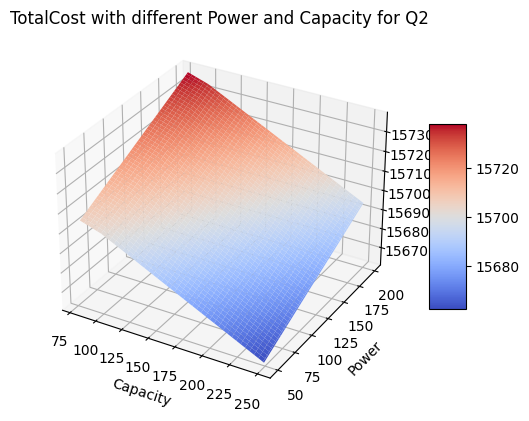

(150,) (170,)


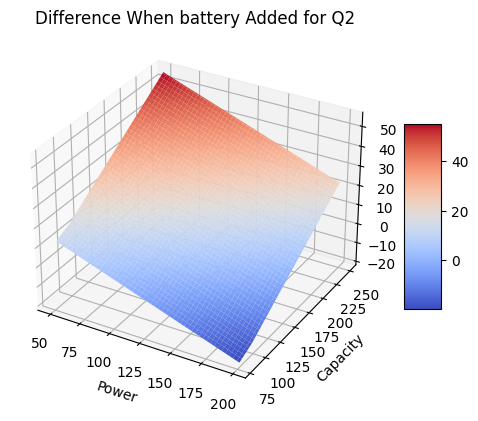

In [32]:
Plot_3D(CapacityRange, 'Capacity',PowerRange,'Power', TotalCost_Q_1_3, 'TotalCost' , 'TotalCost with different Power and Capacity for Q2')
Plot_3D(PowerRange, 'Power', CapacityRange, 'Capacity',  TotalCost.sum()-TotalCost_Q_1_3.T, 'Savings' ,'Difference When battery Added for Q2')